In [1]:
##Notebook para desenvolvimento do projeto 1 de Machine learning
#Desenvolvido por Felipe Arruda (RA: ) e Leonardo Koike (RA: 201332)
#2021

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from typing import List,Dict

In [3]:
data = np.loadtxt('cluster.dat')

In [4]:
def k_means(data: np.ndarray, k_clusters_centers: int) -> np.ndarray: 
    dim = data.shape[1]
    num = data.shape[0]
    # INITIALIZATION
    # Random choice as a kmeans initialization
    idx = np.random.randint(num,size=k_clusters_centers)
    # first values of centroids position
    list_centroids = data[idx,:]
    flag = True
    # LEARNING PART
    # loop that only stop when the list_centroids is the same the loop_centroids
    while flag:
        new_centroids = np.ndarray((k_clusters_centers,dim))
        set_centroids = assign_to_cluster(data_in=data,center_cluster=list_centroids)
        for idx,value in set_centroids.items():
            new_centroids[idx] = np.mean(value,axis=0)
        if np.all(list_centroids==new_centroids):
            flag = False
        else:
            list_centroids = new_centroids
    return new_centroids

def assign_to_cluster(data_in: np.ndarray, center_cluster: np.ndarray) -> Dict[int,List]:
    set_centroids={}
    for i in range(center_cluster.shape[0]):
        set_centroids[i] = []
    assert center_cluster.shape[1] == data_in.shape[1]
    for element in data_in:
        dist = np.linalg.norm(center_cluster-element,axis=1)
        set_centroids[np.argmin(dist)].append(element.tolist())
    return set_centroids

In [5]:
np.random.shuffle(data)
train_index = int(data.shape[0]*0.9)
train_data,test_data = np.vsplit(data,[train_index])

In [6]:
cluster_centers = k_means(data=train_data,k_clusters_centers=3)
set_clusters_train = assign_to_cluster(data_in=train_data,center_cluster=cluster_centers)
set_clusters_test = assign_to_cluster(data_in=test_data,center_cluster=cluster_centers)

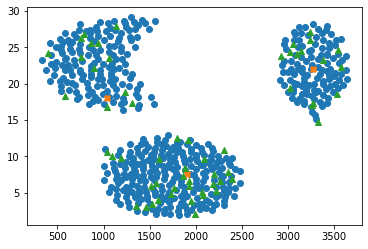

In [7]:
plt.scatter(train_data[:,0],train_data[:,1])
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='X')
plt.scatter(test_data[:,0],test_data[:,1],marker='^')
plt.show()

In [9]:
for index,value in set_clusters_train.items():
    plt.scatter(value[:,0],value[:,1],marker='.')
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='X')
plt.show()

TypeError: list indices must be integers or slices, not tuple